# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('data_SARS-CoV-2_TestMetadata_with_viral.csv')

In [3]:
# iterating the columns 
for col in data.columns: 
    print(col) 

record_date
virus_name
accession_id
type
lineage
passage_details_history
collection_date
location
host
additional_location_info
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
originating_lab_address
sample_id_given_by_sample_provider
submitting_lab
submitting_lab_address
sample_id_given_by_submitting_lab
authors
submitter
submission_date
submitter_address
Query
Strand
%N
Length(nt)
Length(aa)
#Muts
%Muts
#UniqueMuts
%UniqueMuts
#ExistingMuts
%ExistingMuts
Comment
Symbol
Reference
UniqueMutList
ExistingMutList
Clade
IfExistSpecialChar


# Preprocessing and cleaning the data

In [4]:
#important features
#important features
start_data_row = 0
Final_data_row = 255
Data = data.loc[ start_data_row:Final_data_row , ['location','gender','age','status']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))

In [5]:
#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)
Data.index = range(len(Data))

In [6]:
#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)

In [7]:
#organizing the location based on the continent and country (For USA: continent,country, and state )
Location = Data.location.str.split('/')
listToStr_location = list()
for i in range(len(Location)):  
    if Location[i][1:2][0]!=' USA ':
        Location[i] = Location[i][0:2]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
    else:
        Location[i] = Location[i][0:3]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
listToStr_location

['Oceania   Australia ',
 'Oceania   Australia ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Asia   China ',
 'Europe   Russia ',
 'Asia   China ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Ecuador ',
 'Central America   Costa Rica',
 'Central America   Costa Rica',
 'Central America   Costa Rica',
 'Oceania   New Zealand ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   Thailand ',
 'Asia   Thailand ',
 'Nort

In [8]:
#replacing the age that were in months to year
Data['age'] = Data['age'].str.replace('months','')
Data['age'] = Data['age'].str.replace('month','')

for i in range(1,len(Data)):
    index_1 = Data.age[i].find(',') 
    index_2 = Data.age[i].find('-') 
    index_3 = Data.age[i].find('unknown') 
    if index_1!=-1:
        Data.age[i] = Data.age[i][:index_1]
        Data.age[i] = int(float(Data.age[i])/12)
    if index_2!=-1:
        Data.age[i] = int((float(Data.age[i][index_2+1:])+float(Data.age[i][:index_2]))/2)
    if index_3!=-1:
        Data.age[i] = 'NaN'


In [9]:
#deleting the >, 's and s from age
Data['age'] = Data['age'].str.replace('>','')
Data['age'] = Data['age'].str.replace('s','')
Data['age'] = Data['age'].str.replace("'",'')

In [10]:
Data.replace(['female','Female'],value= ['Female','Female'], inplace=True)
Data.replace(['male','Male'],value= ['Male','Male'], inplace=True)        

In [11]:
#the unknown gender is set to missing category
for i in range(1,len(Data)):
    index_4 = Data.gender[i].find('unknown') 
    if index_4!=-1:
        Data.gender[i] = 'missing'


In [12]:
#Labeling
Data.replace(['Deceased'],value= [1], inplace=True)
Data.status[Data['status'] != 1]=0

In [13]:
#using dummies instead of location data for ML input
#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['location']]),pd.get_dummies(Data[['gender']]), Data[['age','status']]], axis=1)
Data_model.head()

,location_Africa / Egypt,location_Africa / Nigeria / Ogun State,location_Asia / Bangladesh / Chattogram,location_Asia / Bangladesh / Dhaka,location_Asia / China / Beijing,location_Asia / China / Fujian,location_Asia / China / Hangzhou,location_Asia / China / Sichuan,location_Asia / China / Zhejiang / Lishui,location_Asia / Georgia / Tbilisi,...,location_South America / Colombia / Cundinamarca / Funza,location_South America / Colombia / Valle del Cauca / Cali,location_South America / Colombia / Valle del Cauca / Palmira,location_South America / Ecuador / Pichincha,location_South America / Uruguay / Montevideo,gender_Female,gender_Male,gender_missing,age,status
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,53,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,21,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,NaN,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,NaN,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,33.5,0


In [14]:
#checking the balance in the data
Data_model['status'].value_counts()

0    172
1     32
Name: status, dtype: int64

In [15]:
#Separating target (label) data
X = Data_model.drop('status',axis=1).astype(float)
y = Data_model.status
y=y.astype(int)
y.value_counts()


0    172
1     32
Name: status, dtype: int64

In [16]:
#splitting features and the label: 20% test data and 80% assigned to training data
# split into train/test sets with same class ratio
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [17]:
### Imputing the unknown data using KNN

In [18]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(X_train[['age']])
X_train['age']=imputer.transform(X_train[['age']])
X_test['age']=imputer.transform(X_test[['age']])

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Balancing the data

In [19]:
#balancing the data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
over = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train, y_train = over.fit_resample(X_train, y_train)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)


C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed

### Scaling the data

In [20]:
# Scaling the data to standarize them
#Here caling reduced the iteration number from 200 to 50
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.06052275, -0.06052275, -0.06052275, ...,  0.99272718,
        -0.08574929, -0.27684737],
       [-0.06052275, -0.06052275, -0.06052275, ..., -1.00732611,
        -0.08574929,  0.04568195],
       [-0.06052275, -0.06052275, -0.06052275, ..., -1.00732611,
        -0.08574929, -0.39264668],
       ...,
       [-0.06052275, -0.06052275, -0.06052275, ...,  0.99272718,
        -0.08574929, -0.39264668],
       [-0.06052275, -0.06052275, -0.06052275, ..., -1.00732611,
        -0.08574929, -0.39264668],
       [-0.06052275, -0.06052275, -0.06052275, ...,  0.99272718,
        -0.08574929,  0.09175756]])

# XGBoost

In [21]:
#fitting the model and get the conversion probabilities. 
#predit_proba() function of our model assigns probability for each row:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
XGB_probs = model.predict_proba(X_test)[:,1]
#Return the mean accuracy on the given test data and taraining data to see if we have overfitting.score clculates R^2
print('R^2 _train=',model.score(X_train, y_train))
print('R^2 _test=',model.score(X_test, y_test))

R^2 _train= 1.0
R^2 _test= 0.926829268292683


### Cross validation 

In [22]:
#Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print('CV-scores_min = ',scores.min())
print('CV_scores_mean =', scores.mean())
print('CV_scores_max =', scores.max())

Cross-Validation Accuracy Scores [1.         0.89285714 0.92857143 1.         0.92592593 0.96296296
 1.         0.96296296 1.         0.96296296]
CV-scores_min =  0.8928571428571429
CV_scores_mean = 0.9636243386243386
CV_scores_max = 1.0


In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df.head(25)

,Actual,Predicted
135,0,0
42,0,0
45,0,0
90,0,0
116,0,0
83,0,0
126,0,0
123,0,0
190,0,0
143,1,0


### Performance measurement metrics

In [24]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

Mean Absolute Error: 0.07317073170731707
Mean Squared Error: 0.07317073170731707
Root Mean Squared Error: 0.2705008904002297


In [25]:
#Area Under ROC Curve (AUROC) metric
from sklearn.metrics import roc_auc_score

# Keep only the positive class
#lr_probs = [p[1] for p in lr_probs]
print( 'roc_auc =', roc_auc_score(y_test, XGB_probs) )

roc_auc = 0.9666666666666667


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.967


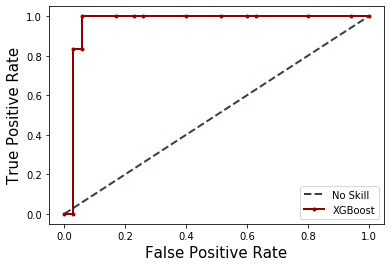

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities

# keep probabilities for the positive outcome only

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
XGB_auc = roc_auc_score(y_test, XGB_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (XGB_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
XGB_fpr, XGB_tpr, _ = roc_curve(y_test, XGB_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', linewidth=2,  color = '#333F4B')
pyplot.plot(XGB_fpr, XGB_tpr, marker='.', label='XGBoost', linewidth=2,  color = 'darkred')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=15)
pyplot.ylabel('True Positive Rate',fontsize=15)
# show the legend
pyplot.legend()
# show the plot
pyplot.show()